<a href="https://colab.research.google.com/github/kandi00/Allamvizsga/blob/main/tsne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import quantile_transform   
import warnings
warnings.filterwarnings('ignore')

In [42]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [41]:
drive.flush_and_unmount()

Raw datasets

In [43]:
path = '/content/drive/My Drive/Államvizsga/csv_files/'
df_human = pd.read_csv(path+'1min.csv', nrows=50)
df_bot_bezier = pd.read_csv(path+'bot_bezier.csv', nrows=50)
df_bot_bezier_random = pd.read_csv(path+'bot_bezier_random.csv', nrows=50)
df_bot_humanLike = pd.read_csv(path+'bot_humanLike.csv', nrows=50)
df_bot_humanLike_random = pd.read_csv(path+'bot_humanlike_random.csv', nrows=50)

In [44]:
df_human['label'] = 0
df_bot_bezier['label'] = 1
df_bot_bezier_random['label'] = 1
df_bot_humanLike['label'] = 1
df_bot_humanLike_random['label'] = 1

Datasets with extracted features

In [45]:
df_human_ = pd.read_csv(path+'1min_extracted_features.csv', nrows=50)
df_bot_bezier_ = pd.read_csv(path+'bot_bezier_extracted_features.csv', nrows=50)
df_bot_bezier_random_ = pd.read_csv(path+'bot_bezier_random_extracted_features.csv', nrows=50)
df_bot_humanLike_ = pd.read_csv(path+'bot_humanLike_extracted_features.csv', nrows=50)
df_bot_humanLike_random_ = pd.read_csv(path+'bot_humanLike_random_extracted_features.csv', nrows=50)

In [46]:
df_human_['label'] = 0
df_bot_bezier_['label'] = 1
df_bot_bezier_random_['label'] = 1
df_bot_humanLike_['label'] = 1
df_bot_humanLike_random_['label'] = 1

In [50]:
print(df_human.append(df_bot_bezier))

     dx1   dx2   dx3    dx4    dx5  ...  dy125  dy126  dy127  dy128  label
0   -9.0 -57.0 -83.0 -128.0  -48.0  ...    0.0    0.0    0.0    0.0      0
1   -5.0 -20.0 -40.0  -67.0 -117.0  ...    0.0    0.0    0.0    0.0      0
2    6.0  15.0  12.0   19.0   23.0  ...    0.0    0.0    0.0    0.0      0
3   -1.0  -4.0  -4.0   -8.0  -12.0  ...    0.0    0.0    0.0    0.0      0
4   -1.0  -1.0  -3.0   -2.0   -5.0  ...    0.0    0.0    0.0    0.0      0
..   ...   ...   ...    ...    ...  ...    ...    ...    ...    ...    ...
45 -39.0 -15.0   6.0   22.0   35.0  ...    0.0    0.0    0.0    0.0      1
46  27.0  24.0  22.0   19.0   17.0  ...    0.0    0.0    0.0    0.0      1
47  36.0  35.0  35.0   33.0   32.0  ...    0.0    0.0    0.0    0.0      1
48  12.0  11.0  12.0   11.0   12.0  ...    0.0    0.0    0.0    0.0      1
49  12.0   9.0   7.0    4.0    3.0  ...    0.0    0.0    0.0    0.0      1

[100 rows x 257 columns]


In [146]:
def plot_tsne(df, NUM_CLASSES, plot_title, plot_suptitle, i):
    rows, cols = df.shape
    array = df.values
    X = array[:, 0:cols - 1]
    y = array[:, -1]
    
    quantile_transform(X, n_quantiles=10, random_state=0, copy=False)

    y = LabelEncoder().fit_transform(y)
    # print(y)
    tsne = TSNE(n_components=2, init='pca', random_state=42)
    X_2d = tsne.fit_transform(X)
    target_ids = np.unique(y)

    plt.subplot(1, 2, i)
    for i in target_ids:
      plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1])

    legendstr = list()
    legendstr.append("HUMAN")
    legendstr.append("BOT")
    plt.legend(legendstr)
    plt.title(plot_title)
    plt.suptitle(plot_suptitle)
    # plt.savefig('/content/' + output_name)

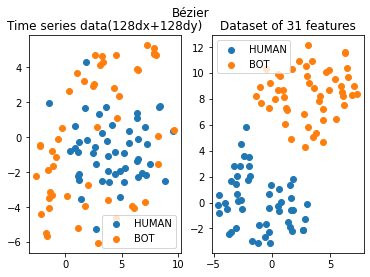

In [147]:
plot_tsne(df_human.append(df_bot_bezier), 2, 'Time series data(128dx+128dy)', 'Bézier', 1)
plot_tsne(df_human_.append(df_bot_bezier_), 2, 'Dataset of 31 features', 'Bézier', 2)

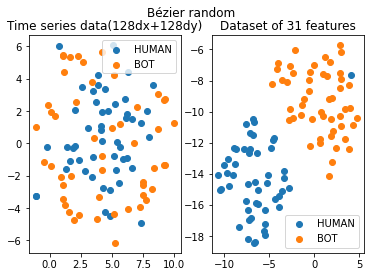

In [148]:
plot_tsne(df_human.append(df_bot_bezier_random), 2, 'Time series data(128dx+128dy)', 'Bézier random', 1)
plot_tsne(df_human_.append(df_bot_bezier_random_), 2, 'Dataset of 31 features', 'Bézier random', 2)

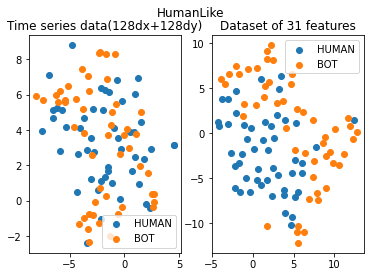

In [149]:
plot_tsne(df_human.append(df_bot_humanLike), 2, 'Time series data(128dx+128dy)', 'HumanLike', 1)
plot_tsne(df_human_.append(df_bot_humanLike_), 2, 'Dataset of 31 features', 'HumanLike', 2)

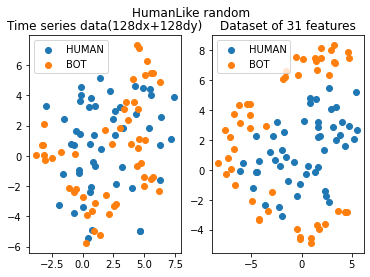

In [150]:
plot_tsne(df_human.append(df_bot_humanLike_random), 2, 'Time series data(128dx+128dy)', 'HumanLike random', 1)
plot_tsne(df_human_.append(df_bot_humanLike_random_), 2, 'Dataset of 31 features', 'HumanLike random', 2)